# Actividad 1 - Análisis de ventas de videojuegos



This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Lista de videojuegos con más de 100.000 ventas generada por vgchartz.com.

La descripción de atributos:

        - Rank: Ranking of overall sales
        - Name: The games name
        - Platform: Platform of the games release (i.e. PC,PS4, etc.)
        - Year: Year of the game's release
        - Genre: Genre of the game
        - Publisher: Publisher of the game
        - NA_Sales: Sales in North America (in millions)
        - EU_Sales: Sales in Europe (in millions)
        - JP_Sales: Sales in Japan (in millions)
        - Other_Sales: Sales in the rest of the world (in millions)
        - Global_Sales: Total worldwide sales.




***
####  1. Descarga y abre el .csv en data-sets de modo que el Rank sea el índice. Muestra la cabeza del dataframe y también la cola.
***


In [1]:
import pandas as pd
df = pd.read_csv('vgsales.csv', index_col='Rank')

In [2]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


***
#### 2. Calcula la dimensión y los data types, comprueba que son correctos.
***

In [4]:
print('registros / filas: ',df.shape[0] )
print('\ncampos / columnas: ',df.shape[1] )

registros / filas:  16598

campos / columnas:  10


In [5]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

***
#### 3. Cuenta el número de categorías únicas en las columnas con tipo de datos `object`.
***

In [6]:
df_object = df.dtypes[df.dtypes==object]
print('nº categorias "Object": ', df_object.shape[0])

for field in df_object.keys():
 print('\n-'+field)


nº categorias "Object":  4

-Name

-Platform

-Genre

-Publisher


***
#### 4.Haz una descripción de los valores con `describe`. Usa el comando `include=all` para obtener también la descripción de los atributos categóricos.
***

In [7]:
df_describe = df.describe(include='all')
df_describe

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


***
#### 5. ¿Tiene valores faltantes? Calcula las proporciones de los mismos por columnas. Introduce los valores faltantes como la media en el caso de variables numéricas y  moda en el de categóricas.
***

In [8]:
# Creamos un dataframe [df_prop] que contenga el nº de filas nulls para cada campo:
fields = [field for field in df.keys()]
prop_nulls = [100 * df[field].isnull().sum()/ df.shape[0] for field in fields]
count_nulls = [df[field].isnull().sum() for field in fields ]

df_prop = pd.DataFrame({'fields':fields, 'count_nulls': count_nulls ,'prop_nulls':prop_nulls})
df_prop['null'] = df_prop.prop_nulls!=0
df_prop

,fields,count_nulls,prop_nulls,null
0,Name,0,0.000000,False
1,Platform,0,0.000000,False
2,Year,271,1.632727,True
3,Genre,0,0.000000,False
4,Publisher,58,0.349440,True
5,NA_Sales,0,0.000000,False
6,EU_Sales,0,0.000000,False
7,JP_Sales,0,0.000000,False
8,Other_Sales,0,0.000000,False
9,Global_Sales,0,0.000000,False


In [9]:
# Mostramos únicamente aquellos campos con valores nulos
cond = df_prop.null==True
df_prop[cond]


,fields,count_nulls,prop_nulls,null
2,Year,271,1.632727,True
4,Publisher,58,0.349440,True


In [10]:
# Ahora lo que hacemos es crear listas que nos separen los campos tipo 'Object'y tipo 'Float64'
object_fields = []
float64_fields = []
float_fields = []
for field in fields:
    if df.dtypes[field] == 'O':
        object_fields.append(field)
    if df.dtypes[field] == 'float64':
        float64_fields.append(field)
        
print('object_fields: ', object_fields)
print('float64_fields: ', float64_fields)

object_fields:  ['Name', 'Platform', 'Genre', 'Publisher']
float64_fields:  ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [11]:
# Ahora iteramos sobre los campos que contienen nulos e intercambiamos los nulos por:
#       - Media (si el campo es de tipo float64)
#       - Moda (si el campo es de tipo Object)

fields_null = [field for field in df_prop[cond].fields]

for field in fields_null:
  if field in object_fields:

    top = df[field].mode()[0]
    df[field] = df[field].fillna(top)
    print('sustituimos valores nulos de "{}" con moda: {}'.format(field,top))
        

  if field in float64_fields:
        
    median = df[field].median()
    df[field] = df[field].fillna(median)
    print('sustituimos valores nulos de "{}" con mediana: {}'.format(field,median))
        


sustituimos valores nulos de "Year" con mediana: 2007.0
sustituimos valores nulos de "Publisher" con moda: Electronic Arts


In [12]:
# Comprobamos ahora proporción de nulos:
fields = [field for field in df.keys()]
prop_nulls = [100 * df[field].isnull().sum()/ df.shape[0] for field in fields]
count_nulls = [df[field].isnull().sum() for field in fields ]

df_prop = pd.DataFrame({'fields':fields, 'count_nulls': count_nulls ,'prop_nulls':prop_nulls})
df_prop['null'] = df_prop.prop_nulls!=0
df_prop

,fields,count_nulls,prop_nulls,null
0,Name,0,0.0,False
1,Platform,0,0.0,False
2,Year,0,0.0,False
3,Genre,0,0.0,False
4,Publisher,0,0.0,False
5,NA_Sales,0,0.0,False
6,EU_Sales,0,0.0,False
7,JP_Sales,0,0.0,False
8,Other_Sales,0,0.0,False
9,Global_Sales,0,0.0,False


***

In [22]:
col = ['NA_Sales','Global_Sales']
df[col].sum()

4392.95/8920.44 *100

49.245889216227

In [24]:
cond = (df['Genre']=='Strategy') & (df['Year']==2011)

df[cond].sort_values(by='NA_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
1208,LEGO Battles: Ninjago,DS,2011.0,Strategy,Warner Bros. Interactive Entertainment,1.07,0.36,0.00,0.12,1.55,23.23
1716,Plants vs. Zombies,DS,2011.0,Strategy,Mastertronic,0.95,0.15,0.00,0.08,1.18,12.71
4926,Combat of Giants: Dinosaurs 3D,3DS,2011.0,Strategy,Ubisoft,0.25,0.06,0.05,0.03,0.39,15.38
5399,Tom Clancy's Ghost Recon: Shadow Wars,3DS,2011.0,Strategy,Ubisoft,0.22,0.09,0.00,0.03,0.34,26.47
3400,Total War: Shogun 2,PC,2011.0,Strategy,Sega,0.19,0.31,0.00,0.09,0.59,52.54
7821,Plants vs. Zombies,PS3,2011.0,Strategy,PopCap Games,0.18,0.00,0.00,0.01,0.19,0.00
6343,Tropico 4,PC,2011.0,Strategy,Kalypso Media,0.10,0.13,0.00,0.04,0.27,48.15
7375,Yu-Gi-Oh! 5D's World Championship 2011: Over t...,DS,2011.0,Strategy,Konami Digital Entertainment,0.10,0.03,0.07,0.01,0.21,14.29
10535,Dora & Kai-Lan's Pet Shelter,DS,2011.0,Strategy,Take-Two Interactive,0.08,0.01,0.00,0.01,0.10,10.00


In [32]:
df[df['Name']=='Need for Speed: Most Wanted']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,40.96
499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89,52.25
1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58,50.63
1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29,13.18
1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16,44.83
2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,44.23
3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,19.64
5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30,76.67
6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28,42.86


In [36]:
len(df['Name'].unique())

11493

In [38]:
df['Name'].unique

<bound method Series.unique of Rank
1                                              Wii Sports
2                                       Super Mario Bros.
3                                          Mario Kart Wii
4                                       Wii Sports Resort
5                                Pokemon Red/Pokemon Blue
                               ...                       
16596                  Woody Woodpecker in Crazy Castle 5
16597                       Men in Black II: Alien Escape
16598    SCORE International Baja 1000: The Official Game
16599                                          Know How 2
16600                                    Spirits & Spells
Name: Name, Length: 16598, dtype: object>

***

***
#### 6. Crea una columna que represente el porcentaje de ventas en Europa respecto a la global y calcula su media, haz que la columna sólo tenga dos cifras decimales.
***

In [13]:
new_column = 'pct_EU_sales'
df[new_column] = round(100 * df['EU_Sales'] / df['Global_Sales'], 2)

media = round(df[new_column].mean(), 2)
print('media de "',new_column,'" :', media, '%')
df

media de " pct_EU_sales " : 22.92 %


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,35.07
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,8.90
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35.96
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.36
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,28.34
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.00
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.00
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00


***
#### 7. Extrae las filas del año 1980.
***

In [14]:
cond_año = df['Year'] == 1980
df[cond_año]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,6.03
545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76,6.16
1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15,6.09
1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05,4.76
2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77,5.19
4027,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0.0,0.01,0.49,6.12
5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34,5.88
6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27,7.41
6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24,4.17


***
#### 8. Extra las filas del juego 'Wii Sports' (hay variaos nombres diferentes)
***

In [279]:
# Si buscamos concretamente el juego "Wii Sports"
cond = df['Name'] == 'Wii Sports'
df[cond]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,35.07


In [15]:
# Si buscamos cualquier variante de "Wii Sports"
import re
regex = re.compile(r'Wii Sports.*')
cond_regex_wii = df['Name'].str.contains(regex)
df [cond_regex_wii]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,35.07
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.36
4854,Wii Sports Club,WiiU,2014.0,Sports,Nintendo,0.19,0.14,0.04,0.03,0.40,35.00


***
#### 9. Extrae las filas correspondientes a los videojuegos con ventas globales superiores a 10 y  entre el año 1990 y 2000 (incluídos)
***

In [16]:
cond = (df['Global_Sales'] > 10) & (df['Year'].between(1990,2000))
df[cond]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,28.34
13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,26.75
19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,18.20
31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64,34.43
47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89,23.97
51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18,18.25
53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,35.34
58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,20.38


In [18]:
b=df[cond]
b.sort_values(by='JP_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pct_EU_sales
Rank,,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,28.34
13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,26.75
19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,18.20
31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64,34.43
51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18,18.25
53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,35.34
58,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55,20.38
47,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89,23.97


***
#### 10. ¿Qué plataforma tiene más ventas globales? ¿Y en cada país? Saca la suma, la media, el máximo y el mínimo del agrupamiento. La tabla debe estar ordenado por la media de las ventas globales. Muestra sólo las 5 de mayores ventas.
***

In [385]:
columns = ['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']

# Tenemos un dataframe Multi-Index porque las funciones de agregación han sido calculadas para columnas diferentes.
# Agrupamos por plataforma todos los juegos de esa plataforma.
# de todos los juegos de esa plataforma, calculamos media, min, max.
# ejemplo: la media de EUR en ventas en cada juego para una plataforma
# ejemplo: el máximo de EUR en ventas de un juego para un plataforma concreta
df_agg = df.groupby('Platform')[columns].agg(['sum','mean','max','min','count'])\
    .reset_index() \
    .sort_values(by=('Global_Sales','mean'), ascending=False)

df_agg.head(20)



Platform Global_Sales                              NA_Sales            \
                     sum      mean    max   min count      sum      mean   
5        GB       255.45  2.606633  31.37  0.06    98   114.32  1.166531   
11      NES       251.07  2.561939  40.24  0.06    98   125.94  1.285102   
8       GEN        28.36  1.050370   6.03  0.03    27    19.27  0.713704   
23     SNES       200.05  0.837029  20.61  0.01   239    61.23  0.256192   
18      PS4       278.10  0.827679  14.24  0.01   336    96.80  0.288095   
28     X360       979.96  0.774672  21.82  0.01  1265   601.05  0.475138   
0      2600        97.08  0.729925   7.81  0.07   133    90.60  0.681203   
17      PS3       957.84  0.720722  21.40  0.01  1329   392.26  0.295154   
26      Wii       926.71  0.699404  82.74  0.01  1325   507.71  0.383177   
10      N64       218.88  0.686144  11.89  0.01   319   139.02  0.435799   
30     XOne       141.06  0.662254   7.30  0.01   213    83.19  0.390563   
15       PS       730.66  0.610920  10.95  0.01  1196   336.51  0.281363   
16      PS2      1255.64  0.581046  20.81  0.01  2161   583.84  0.270171   
27     WiiU        81.86  0.572448   6.96  0.01   143    38.32  0.267972   
2       3DS       247.46  0.486169  14.35  0.01   509    78.87  0.154951   
6       GBA       318.50  0.387470  15.85  0.01   822   187.54  0.228151   
4        DS       822.49  0.380254  30.01  0.01  2163   390.71  0.180633   
7        GC       199.36  0.358561   7.07  0.01   556   133.46  0.240036   
29       XB       258.26  0.313422   8.49  0.01   824   186.69  0.226566   
22      SCD         1.87  0.311667   1.50  0.05     6     1.00  0.166667   

                 ... JP_Sales                              Other_Sales  \
      max   min  ...      sum      mean    max   min count         sum   
5   23.20  0.00  ...    85.12  0.868571  10.22  0.00    98        8.20   
11  29.08  0.00  ...    98.65  1.006633   6.81  0.00    98        5.31   
8    4.47  0.00  ...     2.67  0.098889   0.31  0.00    27        0.89   
23  12.78  0.00  ...   116.55  0.487657   3.81  0.00   239        3.22   
18   5.77  0.00  ...    14.30  0.042560   0.48  0.00   336       43.36   
28  14.97  0.00  ...    12.43  0.009826   0.24  0.00  1265       85.54   
0    7.28  0.07  ...     0.00  0.000000   0.00  0.00   133        0.91   
17   7.01  0.00  ...    79.99  0.060188   1.87  0.00  1329      141.93   
26  41.49  0.00  ...    69.35  0.052340   4.70  0.00  1325       80.61   
10   6.91  0.00  ...    34.22  0.107273   2.23  0.00   319        4.38   
30   4.52  0.00  ...     0.34  0.001596   0.04  0.00   213       11.92   
15   4.02  0.00  ...   139.82  0.116906   4.10  0.00  1196       40.91   
16   9.43  0.00  ...   139.20  0.064415   3.61  0.00  2161      193.44   
27   3.13  0.00  ...    12.79  0.089441   1.44  0.00   143        6.45   
2    5.17  0.00  ...    97.35  0.191257   4.36  0.00   509       12.63   
6    6.06  0.00  ...    47.33  0.057579   5.38  0.00   822        7.73   
4   11.38  0.00  ...   175.57  0.081170   6.50  0.00  2163       60.53   
7    4.41  0.00  ...    21.58  0.038813   1.39  0.00   556        5.18   
29   6.82  0.00  ...     1.38  0.001675   0.24  0.00   824        8.72   
22   1.00  0.00  ...     0.45  0.075000   0.14  0.04     6        0.05   

                                
        mean    max  min count  
5   0.083673   1.00  0.0    98  
11  0.054184   1.51  0.0    98  
8   0.032963   0.19  0.0    27  
23  0.013473   0.55  0.0   239  
18  0.129048   2.31  0.0   336  
28  0.067621   1.67  0.0  1265  
0   0.006842   0.08  0.0   133  
17  0.106795   4.14  0.0  1329  
26  0.060838   8.46  0.0  1325  
10  0.013730   0.23  0.0   319  
30  0.055962   0.67  0.0   213  
15  0.034206   0.96  0.0  1196  
16  0.089514  10.57  0.0  2161  
27  0.045105   0.57  0.0   143  
2   0.024813   0.89  0.0   509  
6   0.009404   0.50  0.0   822  
4   0.027984   2.90  0.0  2163  
7   0.009317   0.22  0.0   556  
29  0.010583   0.13  0.0   824  
22  0.00

In [386]:
# PS2 es la plataforma + vendida, sin embargo el margen que deja cada juego globalmente es inferior
print('Quien tiene más ventas globales en total:')
df_agg.iloc[df_agg['Global_Sales','sum'].argmax()][['Global_Sales','Platform']]

Quien tiene más ventas globales en total:


Global_Sales  sum       1255.64
              mean     0.581046
              max         20.81
              min          0.01
              count        2161
Platform                    PS2
Name: 16, dtype: object

In [391]:
# Seleccionamos para qué país queremos obtener la plataforma con mayores ventas,
# después buscamos el registro que tenga mayor valor en el campo de 'sum'
# Nos quedamos con el índice de ese registro y recuperamos a qué plataforma corresponde

sales_field = fields[5:]
platforms = [df_agg['Platform'].iloc[df_agg[field,'sum'].argmax()] for field in sales_field]
value_max_sell = [df_agg[field,'sum'].max() for field in sales_field]
value_max_count = [df_agg[field,'count'].iloc[df_agg[field,'sum'].argmax()] for field in sales_field]

for country, platform, value, games in zip(sales_field, platforms, value_max_sell, value_max_count) :
    print( '\n\n- Para ventas en: {}, \nla plataforma líder es: {}, \ncon total€ facturados en ventas: {} \ncon nº juegos: {} \nratio precio/juego: {}'.format(country,platform, value, games, value/games))




- Para ventas en: NA_Sales, 
la plataforma líder es: X360, 
con total€ facturados en ventas: 601.05 
con nº juegos: 1265 
ratio precio/juego: 0.47513833992094856


- Para ventas en: EU_Sales, 
la plataforma líder es: PS3, 
con total€ facturados en ventas: 343.71 
con nº juegos: 1329 
ratio precio/juego: 0.25862302483069977


- Para ventas en: JP_Sales, 
la plataforma líder es: DS, 
con total€ facturados en ventas: 175.57 
con nº juegos: 2163 
ratio precio/juego: 0.08116967175219603


- Para ventas en: Other_Sales, 
la plataforma líder es: PS2, 
con total€ facturados en ventas: 193.44 
con nº juegos: 2161 
ratio precio/juego: 0.08951411383618695


- Para ventas en: Global_Sales, 
la plataforma líder es: PS2, 
con total€ facturados en ventas: 1255.64 
con nº juegos: 2161 
ratio precio/juego: 0.5810458121240167


***
#### 11. Los 10 videojuegos de estrategia más populares de 2011 en NA.
***

In [397]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [407]:
# Para obtener los más populares, son los que más ventas tienen
cond = (df.Genre=='Strategy') & (df.Year==2011) 
df[cond].sort_values(by='NA_Sales', ascending=False).head(10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1208,LEGO Battles: Ninjago,DS,2011.0,Strategy,Warner Bros. Interactive Entertainment,1.07,0.36,0.00,0.12,1.55
1716,Plants vs. Zombies,DS,2011.0,Strategy,Mastertronic,0.95,0.15,0.00,0.08,1.18
4926,Combat of Giants: Dinosaurs 3D,3DS,2011.0,Strategy,Ubisoft,0.25,0.06,0.05,0.03,0.39
5399,Tom Clancy's Ghost Recon: Shadow Wars,3DS,2011.0,Strategy,Ubisoft,0.22,0.09,0.00,0.03,0.34
3400,Total War: Shogun 2,PC,2011.0,Strategy,Sega,0.19,0.31,0.00,0.09,0.59
7821,Plants vs. Zombies,PS3,2011.0,Strategy,PopCap Games,0.18,0.00,0.00,0.01,0.19
6343,Tropico 4,PC,2011.0,Strategy,Kalypso Media,0.10,0.13,0.00,0.04,0.27
7375,Yu-Gi-Oh! 5D's World Championship 2011: Over t...,DS,2011.0,Strategy,Konami Digital Entertainment,0.10,0.03,0.07,0.01,0.21
10535,Dora & Kai-Lan's Pet Shelter,DS,2011.0,Strategy,Take-Two Interactive,0.08,0.01,0.00,0.01,0.10


***
#### 12. Crea una tabla pivotal que de los máximos de las ventas globales respecto a plataforma y género. Debe incluir valores marginales. Debe estar ordenada descendientemente respecto al máximo de cada plataforma.
***

In [429]:
# Pivotamos segun plataform y genre
# Ordenada descendientemente respecto al máximo de cada plataforma, es decir, el orden se da entre los géneros de una misma plataforma
columns = ['Global_Sales']
df.groupby(['Platform','Genre'])[columns].agg('max')\
  .reset_index()\
  .sort_values(by=['Platform','Global_Sales'], ascending=False)

,Platform,Genre,Global_Sales
289,XOne,Shooter,7.30
282,XOne,Action,5.08
288,XOne,Role-Playing,4.09
291,XOne,Sports,3.23
285,XOne,Misc,2.41
...,...,...,...
6,2600,Racing,1.18
3,2600,Misc,1.15
2,2600,Fighting,0.77
9,2600,Sports,0.55


***
#### 13. Crea una tabla de frecuencias que cuente dentro de cada género y plataforma el número de juegos que entraron en cada bin de la partición por cuartiles de las ventas globales usando 0.1,0.25,0.5,0.75,0.9 y `pd.qcut`
***

In [452]:
# Creamos un campo con los cuartiles a los que pertencen según sus ventas globales
df['Cuartiles'] = pd.qcut(df['Global_Sales'], [0.1, 0.25, 0.5, 0.75, 0.9])

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cuartiles
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,NaN
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,NaN
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,NaN
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,NaN
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,NaN
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN


In [458]:
# Aquí vemos para cada plataforma y género, la cantidad de juegos que pertenecen a cada quantil
pd.crosstab([df['Platform'], df['Genre']], df['Cuartiles']).reset_index()

Cuartiles,Platform,Genre,"(0.019, 0.06]","(0.06, 0.17]","(0.17, 0.47]","(0.47, 1.21]"
0,2600,Action,0,5,37,16
1,2600,Adventure,0,0,1,0
2,2600,Fighting,0,0,1,1
3,2600,Misc,0,0,2,3
4,2600,Platform,0,0,0,5
...,...,...,...,...,...,...
284,XOne,Role-Playing,2,2,4,2
285,XOne,Shooter,2,5,3,9
286,XOne,Simulation,0,0,2,0
287,XOne,Sports,6,7,6,8


***
#### 14. Realiza un gráfico de barras de la cantidad de ventas respecto al género en los distintos mercados: NA, EU, JP y Other. ¿Qué observas? ¿ Qué mercados tienen gustos de consumo parecidos?
***

In [501]:
# En qué se mide la cantidad de ventas? --> en cantidad de dinero
# Agrupamos por genero y sumamos las ventas totales en cada país
columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
df_mercado = df.groupby('Genre')[columns].agg('sum')


In [502]:
df_mercado

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,877.83,525.00,159.95,187.38
Adventure,105.80,64.13,52.07,16.81
Fighting,223.59,101.32,87.35,36.68
Misc,410.24,215.98,107.76,75.32
Platform,447.05,201.63,130.77,51.59
Puzzle,123.78,50.78,57.31,12.55
Racing,359.42,238.39,56.69,77.27
Role-Playing,327.28,188.06,352.31,59.61
Shooter,582.60,313.27,38.28,102.69


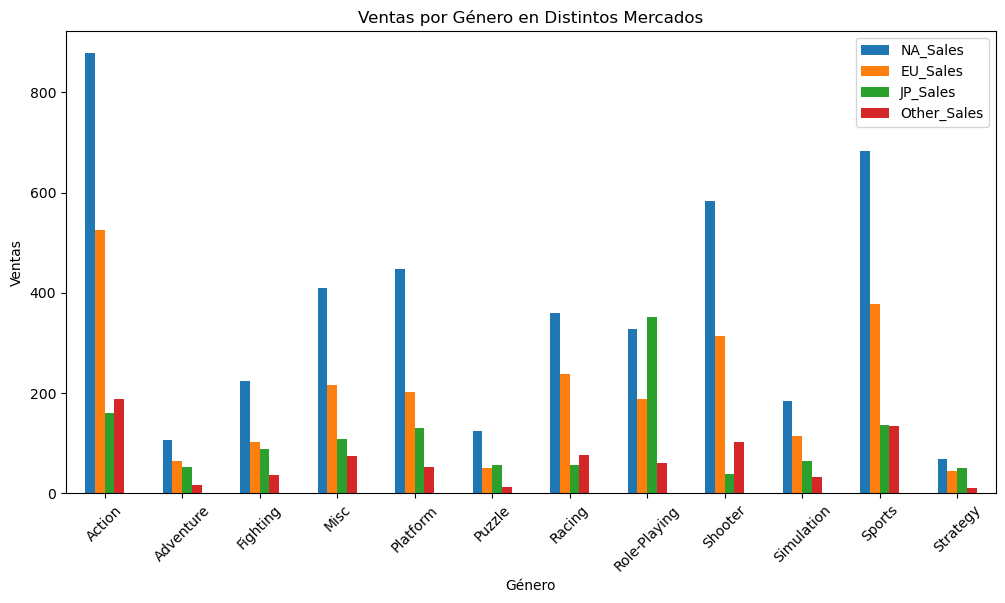

In [462]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
df_mercado.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por Género en Distintos Mercados')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

In [464]:

df_mercado.reset_index()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,877.83,525.00,159.95,187.38
1,Adventure,105.80,64.13,52.07,16.81
2,Fighting,223.59,101.32,87.35,36.68
3,Misc,410.24,215.98,107.76,75.32
4,Platform,447.05,201.63,130.77,51.59
5,Puzzle,123.78,50.78,57.31,12.55
6,Racing,359.42,238.39,56.69,77.27
7,Role-Playing,327.28,188.06,352.31,59.61
8,Shooter,582.60,313.27,38.28,102.69
9,Simulation,183.31,113.38,63.70,31.52


In [472]:
columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for columna in columns:
    df_mercado[columna+'pct'] = (df_mercado[columna] / df_mercado[columna].sum()) * 100

df_mercado

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Salespct,EU_Salespct,JP_Salespct,Other_Salespct
Genre,,,,,,,,
Action,877.83,525.00,159.95,187.38,19.982700,21.568281,12.389429,23.488562
Adventure,105.80,64.13,52.07,16.81,2.408404,2.634617,4.033245,2.107176
Fighting,223.59,101.32,87.35,36.68,5.089746,4.162473,6.765968,4.597932
Misc,410.24,215.98,107.76,75.32,9.338599,8.872985,8.346889,9.441554
Platform,447.05,201.63,130.77,51.59,10.176533,8.283452,10.129200,6.466938
Puzzle,123.78,50.78,57.31,12.55,2.817697,2.086166,4.439126,1.573175
Racing,359.42,238.39,56.69,77.27,8.181746,9.793643,4.391102,9.685992
Role-Playing,327.28,188.06,352.31,59.61,7.450119,7.725964,27.289275,7.472266
Shooter,582.60,313.27,38.28,102.69,13.262159,12.869896,2.965097,12.872454


In [475]:
columns_pct = [column+'pct' for column in columns]
columns_pct

['NA_Salespct', 'EU_Salespct', 'JP_Salespct', 'Other_Salespct']

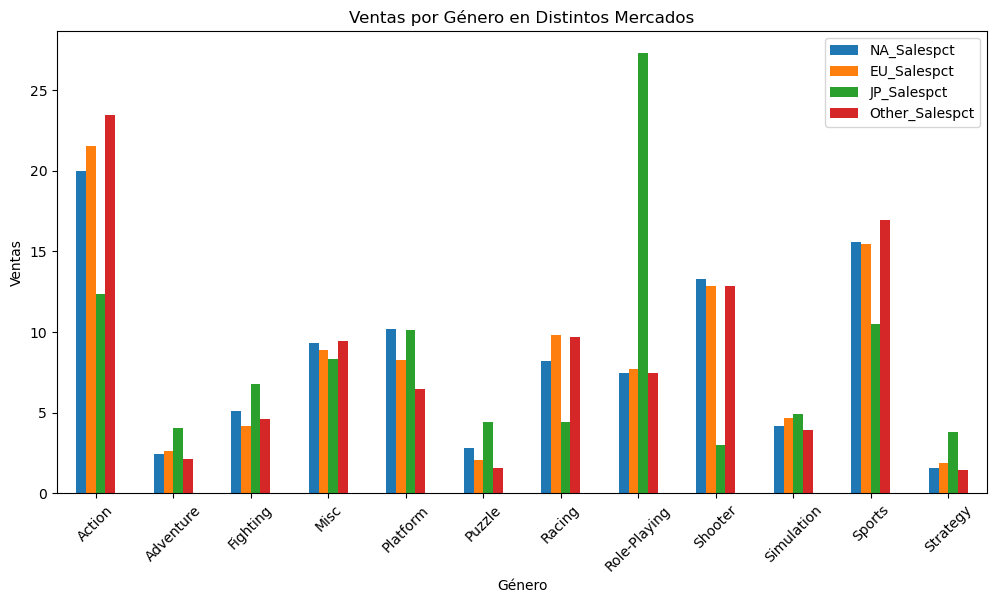

Como vemos abajo, los mercados que tiene gustos parecidos son a priori NA, EU y Others, 
sin embargo NA y EU con respecto a Others difieren en el género de Action, 
por lo tanto los dos mercados que tienen ventas un porcentaje de ventas parejas en todos los géneros son NA y EU


In [478]:
import matplotlib.pyplot as plt

df_mercado_pct = df_mercado[columns_pct]
# Crear el gráfico de barras
df_mercado_pct.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por Género en Distintos Mercados')
plt.xlabel('Género')
plt.ylabel('Ventas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()


print('Como vemos abajo, los mercados que tiene gustos parecidos son a priori NA, EU y Others, \nsin embargo NA y EU con respecto a Others difieren en el género de Action, \npor lo tanto los dos mercados que tienen ventas un porcentaje de ventas parejas en todos los géneros son NA y EU')

***
#### 15. Realiza una gráfica de serie temporal en la que aparezcan las ventas de cada mercado desde sus orígenes. ¿Son semejantes las series temporales? ¿ Qué puntos de cambio de tendencias observas?
***

In [503]:
# Para crear tabla de series temporales escribimos, agrupamos por Año y sumamos en cada tipo de mercado

columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']

#df.pivot_table(index='Year', values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], aggfunc='sum')
df_serie_temporal = df.groupby('Year')[columns].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70
1985.0,33.73,4.74,14.56,0.92
1986.0,12.50,2.84,19.81,1.93
1987.0,8.46,1.41,11.63,0.20
1988.0,23.87,6.59,15.76,0.99


In [561]:
# El problema de la tabla anterior es que los años están agregados o stacked, entonces hacemos un unstack sobre el df_serie_temporal
panda_series_serie_temporal_unstack = df_serie_temporal.unstack()
panda_series_serie_temporal_unstack

             Year  
NA_Sales     1980.0    10.59
             1981.0    33.40
             1982.0    26.92
             1983.0     7.76
             1984.0    33.28
                       ...  
Other_Sales  2014.0    40.02
             2015.0    30.01
             2016.0     7.75
             2017.0     0.00
             2020.0     0.02
Length: 156, dtype: float64

In [572]:
# Con lo anterior obtenemos un array unidimensional y con multiindex, lo que haremos será convertirlo en un dataframe de pandas 2D
df_serie_temporal_unstack = panda_series_serie_temporal_unstack.reset_index()
df_serie_temporal_unstack

,level_0,Year,0
0,NA_Sales,1980.0,10.59
1,NA_Sales,1981.0,33.40
2,NA_Sales,1982.0,26.92
3,NA_Sales,1983.0,7.76
4,NA_Sales,1984.0,33.28
...,...,...,...
151,Other_Sales,2014.0,40.02
152,Other_Sales,2015.0,30.01
153,Other_Sales,2016.0,7.75
154,Other_Sales,2017.0,0.00


In [579]:
df_serie_temporal_unstack = df_serie_temporal_unstack.rename(columns={'level_0':'Mercados',0:'Sales'})
df_serie_temporal_unstack

,Mercados,Year,Sales
0,NA_Sales,1980.0,10.59
1,NA_Sales,1981.0,33.40
2,NA_Sales,1982.0,26.92
3,NA_Sales,1983.0,7.76
4,NA_Sales,1984.0,33.28
...,...,...,...
151,Other_Sales,2014.0,40.02
152,Other_Sales,2015.0,30.01
153,Other_Sales,2016.0,7.75
154,Other_Sales,2017.0,0.00


In [589]:
df_serie_temporal_unstack[df_serie_temporal_unstack.Year>2013]

,Mercados,Year,Sales
34,NA_Sales,2014.0,131.97
35,NA_Sales,2015.0,102.82
36,NA_Sales,2016.0,22.66
37,NA_Sales,2017.0,0.00
38,NA_Sales,2020.0,0.27
73,EU_Sales,2014.0,125.65
74,EU_Sales,2015.0,97.71
75,EU_Sales,2016.0,26.76
76,EU_Sales,2017.0,0.00
77,EU_Sales,2020.0,0.00


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Sales'>

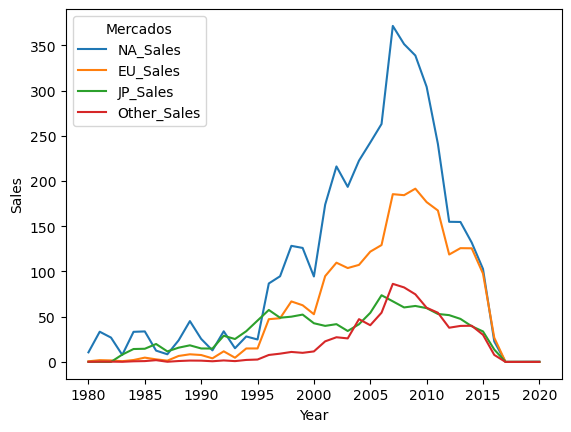

In [593]:
# hue tiene que ser mercado que ofrece la venta
# x tiene que ser Year
# y tiene que ser venta

import seaborn as sns
sns.lineplot(x='Year',y='Sales',hue='Mercados',data=df_serie_temporal_unstack)



In [592]:
print('A partir de 1995, las series temporales separan su tendencia, disparándose las ventas en NA. \A partir de 2015, las ventas pegan un bajón')

A partir de 1995, las series temporales separan su tendencia, disparándose las ventas en NA. \A partir de 2015, las ventas pegan un bajón


***
####  Problema avanzado:

 #### **Agrupa respecto a géneros y plataformas hazlo. ¿Qué tres plataformas tienen mayor media de ventas globales en cada género? Haz una tabla que las muestre.**
***

In [605]:
# Agrupamos por plataforma y género y calculamos la media de ventas globales para ese género en esa plataforma
columns = ['Global_Sales']
a = df.groupby(['Platform','Genre'])[columns].agg('mean').reset_index()

,Platform,Genre,Global_Sales
0,2600,Action,0.480984
1,2600,Adventure,0.850000
2,2600,Fighting,0.620000
3,2600,Misc,0.716000
4,2600,Platform,1.474444
...,...,...,...
288,XOne,Role-Playing,0.729231
289,XOne,Shooter,1.563939
290,XOne,Simulation,0.180000
291,XOne,Sports,0.665833


In [640]:
# Ahora queremos recorrer cada género y saber qué tres valores de Global Series son los mayores para cada genero
#a.groupby('Genre').apply(lambda x: x.nlargest(2, 'Global_Sales'))

# Creamos una función que se aplica sobre los campos númericos y te saque los 3 valores mayores:
def tres_mayores(x):
    return  x.nlargest(3, 'Global_Sales')

# Aplicamos esa función de sobre el dataframe agrupado:
a.groupby('Genre').apply(tres_mayores)

Platform         Genre  Global_Sales
Genre                                                
Action       104      NES        Action      2.211538
             46        GB        Action      1.320000
             81       GEN        Action      0.913333
Adventure    105      NES     Adventure      4.380000
             47        GB     Adventure      3.432000
             1       2600     Adventure      0.850000
Fighting     106      NES      Fighting      1.635000
             248     WiiU      Fighting      1.272000
             83       GEN      Fighting      1.180000
Misc         107      NES          Misc      1.795000
             48        GB          Misc      1.668750
             237      Wii          Misc      0.789500
Platform     108      NES      Platform      3.420714
             49        GB      Platform      2.890000
             222     SNES      Platform      2.525000
Puzzle       50        GB        Puzzle      3.164667
             109      NES        Puzzle      1.500000
             5       2600        Puzzle      1.334545
Racing       252     WiiU        Racing      2.590000
             110      NES        Racing      2.445000
             51        GB        Racing      2.275000
Role-Playing 52        GB  Role-Playing      4.201905
             111      NES  Role-Playing      1.707273
             265     X360  Role-Playing      0.947105
Shooter      112      NES       Shooter      5.088571
             173      PS4       Shooter      2.215294
             289     XOne       Shooter      1.563939
Simulation   101      N64    Simulation      1.019000
             22       3DS    Simulation      0.902667
             78        GC    Simulation      0.715833
Sports       113      NES        Sports      1.917857
             175      PS4        Sports      1.164419
             244      Wii        Sports      1.119004
Strategy     56        GB      Strategy      1.150000
             103      N64      Strategy      1.147778
             68       GBA      Strategy      0.413889